# Capstone Project

# Identifying Pneumonia by Chest X-Ray Images

I will build a convolutional neural network (CNN) to identify whether a patient has pneumonia or not by classifying their medical images. Recall shall be the success metric as there is a high risk associated with false negative classification when it comes to human diseases.

This project is adequately scoped and focuses on one specific type of disease rather than targeting multiple diagnosis. Therefore, there is a high chance to generate substentially accurate results.

Pneumonia is an infection that inflames lungs and can be diagnosed by radiologists who view the patient's chest x-rays. Creating an algorithm that provides accurate diagnosis can be beneficial for both patients and medical proffesionals.


## Data Guidelines

Source: https://data.mendeley.com/datasets/rscbjbr9sj/2  
Published: 6 Jan 2018 | Version 2 | DOI: 10.17632/rscbjbr9sj.2  
Contributor(s): Daniel Kermany, Kang Zhang, Michael Goldbaum

Kaggle link:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia  

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

**Train Dataset**

3883 .jpeg images labeled as PNEUMONIA (bacterial).  
1349 .jpeg images labeled as NORMAL.

**Test Dataset**

390 .jpeg images labeled as PNEUMONIA (viral).  
234 .jpeg images labeled as NORMAL.

### Imports

In [4]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from glob import glob

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping

### Load the data

In [45]:
train_dir = './data/ChestXRay2017/chest_xray/train/'
test_dir = './data/ChestXRay2017/chest_xray/test'

In [54]:
# Pneumonia images
p_images = glob(train_dir + '/PNEUMONIA/*.jpeg')

In [55]:
# Normal images
n_images = glob(train_dir + '/NORMAL/*.jpeg')

### EDA

In [63]:
# Convert the first image to array of pixels
np.asarray(plt.imread(p_images[0]))

array([[19, 19, 18, ...,  1,  0,  0],
       [19, 19, 18, ...,  1,  0,  0],
       [19, 19, 18, ...,  1,  0,  0],
       ...,
       [10, 10, 10, ..., 15, 15, 15],
       [10, 10, 10, ..., 15, 15, 15],
       [10, 10, 10, ..., 15, 15, 15]], dtype=uint8)

In [64]:
# Check the shape
np.asarray(plt.imread(p_images[0])).shape

(760, 1152)

In [65]:
# Convert the first image to array of pixels
np.asarray(plt.imread(n_images[0]))

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

In [66]:
# Check the shape
np.asarray(plt.imread(n_images[0])).shape

(1858, 2090)

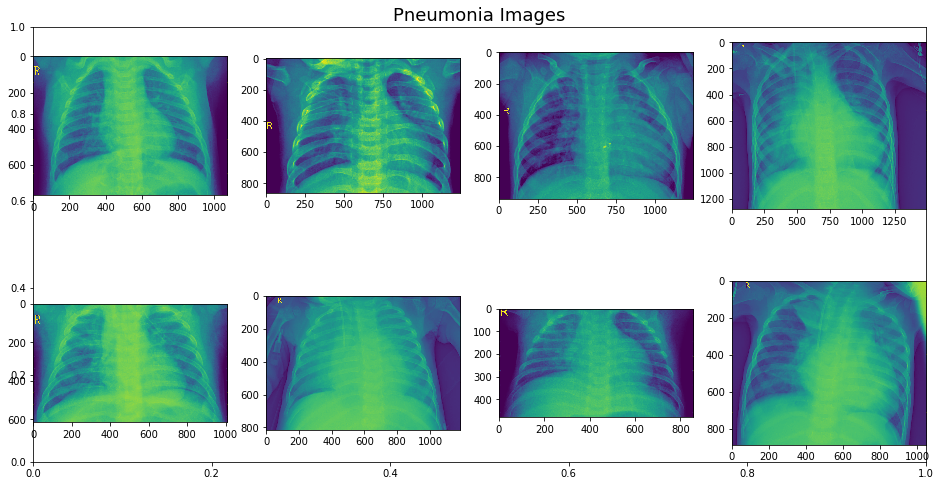

In [68]:
# Plot first eight images
fig=plt.figure(figsize=(16, 8))
plt.title('Pneumonia Images', fontsize=18)
cols = 4
rows = 2
for i in range(1, cols*rows +1):
    img = np.asarray(plt.imread(p_images[i]))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)
plt.show()

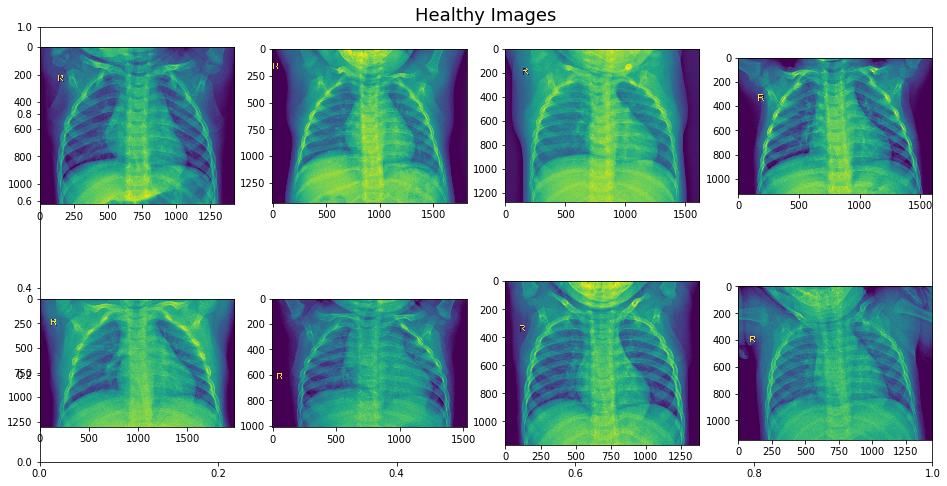

In [69]:
# Plot first eight images
fig=plt.figure(figsize=(16, 8))
plt.title('Healthy Images', fontsize=18)
cols = 4
rows = 2
for i in range(1, cols*rows +1):
    img = np.asarray(plt.imread(n_images[i]))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)
plt.show()

### Data Preprocessing

In [82]:
# https://keras.io/preprocessing/image/

# Instantiate data generator object
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [83]:
classes = ['normal', 'pneumonia']
train_images = glob(train_dir + '/NORMAL/*.jpeg') + glob(train_dir + '/PNEUMONIA/*.jpeg')

In [84]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#Data augmentation
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (226, 226), # resize all images
        classes = classes, # label classes
        batch_size = 32, 
        class_mode = 'categorical')

Found 5232 images belonging to 2 classes.


In [85]:
train_generator.image_shape

(226, 226, 3)

In [86]:
# Repeat for test
test_images = glob(test_dir + '/NORMAL/*.jpeg') + glob(test_dir + '/PNEUMONIA/*.jpeg')

In [87]:
test_datagen = ImageDataGenerator(rescale=1./255)